In [2]:
import pandas as pd

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from xgboost import XGBClassifier

import nltk
from nltk.corpus import stopwords

import pickle

# Reading training data 

In [119]:
df = pd.read_csv("design_health_data.csv")

In [120]:
df.shape

(1147, 6)

Count of true and fake news

In [117]:
df['label'].value_counts()

true    582
fake    565
Name: label, dtype: int64

In [121]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,title,text,source,label
0,0,0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,fake
1,1,1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,fake
2,2,2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,fake
3,3,3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,fake
4,4,4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,fake


In [124]:
df = df.dropna()

In [125]:
df.shape

(1050, 6)

Converting input and target values as array format for training

In [131]:
X = df["text"].values
y = df.label.values

In [132]:
type(X)

numpy.ndarray

Converting input text data into vectors using TFidf vectorisation method also removing stop words while doing vectorisation

initialising Tfidf model

In [129]:
tfidf = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS,ngram_range=(1,2),max_df=0.85, min_df=0.01)

fitting the model with the input data

In [133]:
X_tfidf = tfidf.fit_transform(X)

In [155]:
X_tfidf

<1050x5286 sparse matrix of type '<class 'numpy.float64'>'
	with 205880 stored elements in Compressed Sparse Row format>

splitting the data into training and testing in the ratio of 80:20

In [156]:
X_tfidf_train, X_tfidf_test, y_label_train, y_label_test = train_test_split(X_tfidf,y, test_size = 0.2, random_state=1234)


initialising XGBoost Classifier

In [135]:
xgb = XGBClassifier()

fitting or training the input data in XGBoost classifier

In [157]:
xgb.fit(X_tfidf_train, y_label_train)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

predict test data

In [158]:
y_xgb_pred = xgb.predict(X_tfidf_test)

In [138]:
y_xgb_pred

array(['fake', 'fake', 'fake', 'true', 'fake', 'true', 'fake', 'true',
       'fake', 'true', 'fake', 'true', 'true', 'true', 'true', 'true',
       'fake', 'true', 'fake', 'fake', 'fake', 'true', 'fake', 'fake',
       'true', 'fake', 'true', 'true', 'true', 'true', 'true', 'fake',
       'true', 'true', 'fake', 'true', 'fake', 'fake', 'fake', 'fake',
       'fake', 'true', 'true', 'true', 'true', 'fake', 'fake', 'true',
       'fake', 'fake', 'fake', 'fake', 'true', 'fake', 'fake', 'true',
       'true', 'true', 'fake', 'fake', 'true', 'fake', 'fake', 'true',
       'fake', 'fake', 'true', 'true', 'fake', 'fake', 'true', 'true',
       'fake', 'fake', 'true', 'true', 'fake', 'true', 'fake', 'true',
       'fake', 'fake', 'fake', 'fake', 'true', 'fake', 'fake', 'true',
       'fake', 'fake', 'fake', 'true', 'fake', 'true', 'fake', 'true',
       'fake', 'fake', 'true', 'fake', 'fake', 'true', 'fake', 'true',
       'true', 'true', 'fake', 'true', 'true', 'fake', 'true', 'fake',
      

In [139]:
y_label_test

array(['fake', 'fake', 'fake', 'fake', 'fake', 'true', 'true', 'true',
       'fake', 'true', 'fake', 'true', 'true', 'true', 'true', 'fake',
       'fake', 'true', 'fake', 'true', 'fake', 'true', 'fake', 'true',
       'true', 'fake', 'true', 'fake', 'true', 'true', 'true', 'fake',
       'true', 'fake', 'fake', 'true', 'fake', 'fake', 'fake', 'fake',
       'fake', 'true', 'true', 'true', 'fake', 'fake', 'fake', 'true',
       'fake', 'fake', 'fake', 'fake', 'true', 'fake', 'true', 'fake',
       'fake', 'true', 'fake', 'fake', 'true', 'fake', 'fake', 'true',
       'fake', 'fake', 'true', 'true', 'fake', 'true', 'true', 'true',
       'fake', 'fake', 'true', 'true', 'fake', 'true', 'fake', 'fake',
       'true', 'fake', 'fake', 'fake', 'true', 'fake', 'fake', 'true',
       'fake', 'fake', 'fake', 'true', 'fake', 'true', 'true', 'true',
       'fake', 'fake', 'true', 'fake', 'fake', 'true', 'fake', 'fake',
       'true', 'true', 'fake', 'true', 'fake', 'fake', 'true', 'fake',
      

In [140]:
from sklearn.metrics import  accuracy_score

In [142]:
print('XGBOOST ACCURACY \n')
print ( "Accuracy score {:.4}%".format(accuracy_score(y_label_test, y_xgb_pred)*100) )

XGBOOST ACCURACY 

Accuracy score 85.24%


In [143]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix


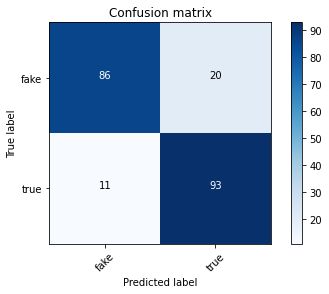

In [145]:
cm = metrics.confusion_matrix(y_label_test, y_xgb_pred, labels=['fake', 'true'])
plot_confusion_matrix(cm, classes=['fake', 'true'])

In [152]:

# 
pickle_out = open("fake_news_detector.pickle","wb")
pickle.dump(xgb, pickle_out)
# pickle_out.close()

In [154]:
loaded_model = pickle.load(open( "fake_news_detector.pickle", "rb" ) )